<h1>Cell classification with supervised models</h1>

In [2]:
import sys
if '/home/ross/immunova' not in sys.path:
    sys.path.append('/home/ross/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.supervised_algo.cell_classifier import create_reference_sample
from warnings import filterwarnings
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
filterwarnings('ignore')
pd_init()

In [3]:
texp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

In [4]:
exclude = [f'{x}_pdmc_t' for x in ['209-03', '210-14', '273-01', '298-01', '322-01', '237-06', '302-01']]

In [5]:
create_reference_sample(experiment=texp,
                        root_population='single_Live_CD3+',
                        exclude=exclude,
                        sample_n=10000)

-------------------- Generating Reference Sample --------------------
Finding features common to all fcs files...
Sampling 142-09_pdmc_t...
Sampling 165-09_pdmc_t...
Sampling 175-09_pdmc_t...
Sampling 209-05_pdmc_t...
Sampling 239-02_pdmc_t...
Sampling 239-04_pdmc_t...
Sampling 251-07_pdmc_t...
Sampling 251-08_pdmc_t...
Sampling 254-04_pdmc_t...
Sampling 254-05_pdmc_t...
Sampling 255-04_pdmc_t...
Sampling 255-05_pdmc_t...
Sampling 264-02_pdmc_t...
Sampling 267-02_pdmc_t...
Sampling 276-01_pdmc_t...
Sampling 286-03_pdmc_t...
Sampling 286-04_pdmc_t...
Sampling 294-02_pdmc_t...
Sampling 294-03_pdmc_t...
Sampling 305-01_pdmc_t...
Sampling 305-03_pdmc_t...
Sampling 306-01_pdmc_t...
Sampling 308-02R_pdmc_t...
Sampling 308-03R_pdmc_t...
Sampling 308-04_pdmc_t...
Sampling 310-01_pdmc_t...
Sampling 315-01_pdmc_t...
Sampling 315-02_pdmc_t...
Sampling 318-01_pdmc_t...
Sampling 323-01_pdmc_t...
Sampling 324-01_pdmc_t...
Sampling 326-01_pdmc_t...
Sampling 267-01_pdmc_t...
Sampling 279-03_pdmc_t...


<h2>Gate the sampled data</h2>

We have a sampled dataset, a concatination of the 43 PDMC samples. I will now label this dataset to be used as training data for a supervised machine learning model that will perform multi-label classification of cells.



In [5]:
sample = Gating(texp, 'PD_T_PDMCs_sampled_data', include_controls=False)

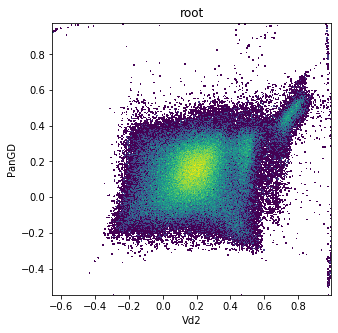

In [6]:
sample.plotting.plot_population('root', 'Vd2', 'PanGD', transforms={'x': 'logicle',
                                                                    'y': 'logicle'})

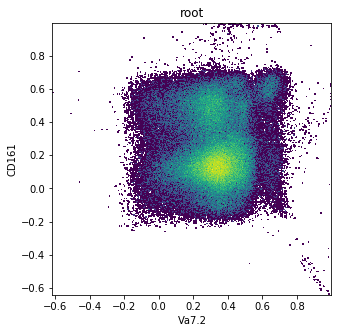

In [10]:
sample.plotting.plot_population('root', 'Va7.2', 'CD161', transforms={'x': 'logicle',
                                                                  'y': 'logicle'})

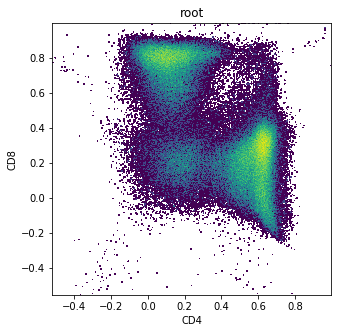

In [11]:
sample.plotting.plot_population('root', 'CD4', 'CD8', transforms={'x': 'logicle',
                                                                  'y': 'logicle'})